#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the unemployment dataset

In [2]:
data = pd.read_csv(r'F:\INTERNSHIPS\OASIS INFOBYTE\TASK 2\DATASET FOR (TASK 2)\Unemployment in India.csv')

####  Data Exploration

In [3]:
# First 5 rows of the dataset
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
# Last five rows of the dataset
data.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
767,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Checking number of rows and columns of the dataset
print(" SHAPE OF THE UNEMPLOYMENT DATASET:")
print("*****************************************")
data.shape

 SHAPE OF THE UNEMPLOYMENT DATASET:
*****************************************


(768, 7)

- Our dataset contains 768 rows and 7 columns

In [6]:
# Column names of the dataset
print("\tCOLUMN NAMES OF THE DATASET:")
print("**********************************************")
data.columns

	COLUMN NAMES OF THE DATASET:
**********************************************


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [7]:
# Information of the dataset
print("\t\tINFORMATION OF DATASET ")
print("*****************************************************")
data.info()

		INFORMATION OF DATASET 
*****************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
# Descriptive statistics
print("\t\t\t\tSUMMARY STATISTICS ")
print("\t\t**************************************************")
stats=data.describe()
stats

				SUMMARY STATISTICS 
		**************************************************


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


#### Data Preprocessing

In [9]:
# Checking for null values
print("\tNULL VALUES OF THE DATASET")
print("*****************************************************")
null_values = data.isnull().sum()
print(null_values)

	NULL VALUES OF THE DATASET
*****************************************************
Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


- We can see that our dataset contains null values. 
- We will remove these null values.

In [10]:
# Remove rows with missing values
data.dropna(inplace=True)

- Now we check missing values are removed or not.

In [11]:
data.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

- We have removed all the null values of our dataset.

**After removing missing values**

In [12]:
# First five rows of dataset
print("After removing missing values")
print("Our new non empty dataset is")
data.head()

After removing missing values
Our new non empty dataset is


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [13]:
# Number of rows and columns of dataset
data.shape

(740, 7)

- As we can see after removing missing value rows, now we are left with 740 rows

In [14]:
# Function to clean and preprocess the date column
def clean_and_preprocess_date(data, Date):
    data[Date] = pd.to_datetime(data[Date], errors='coerce')

    data.dropna(subset=[Date], inplace=True)

    data['year'] = data[Date].dt.year
    data['month'] = data[Date].dt.month
    data['day'] = data[Date].dt.day

    return data

data = clean_and_preprocess_date(data, ' Date')  # Notice the space before 'Date'

In [15]:
# Display the cleaned and preprocessed DataFrame
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,year,month,day
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,5,31
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,6,30
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,7,31
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,8,31
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,9,30


In [16]:
# Checking Duplicate Values
data.duplicated().sum()

0

- We can say that our dataset do not have any duplicate values.

In [17]:
# Clean column names by stripping leading and trailing spaces
data.columns = data.columns.str.strip()

In [18]:
# After cleaning and preprocessing dataset
data.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,year,month,day
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,2019,5,31
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,2019,6,30
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,2019,7,31
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,2019,8,31
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,2019,9,30


#### Data Visualizations

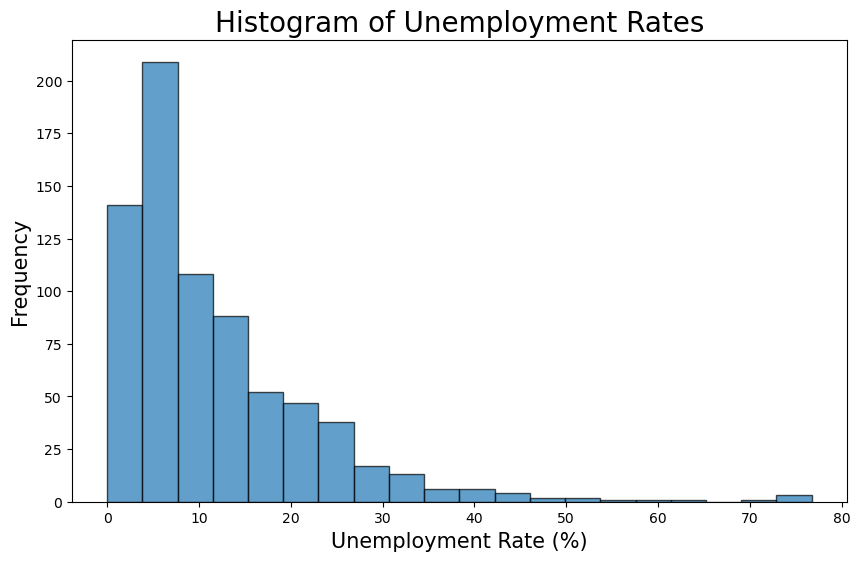

In [19]:
# Histogram of Unemployment Rates
plt.figure(figsize=(10, 6))
plt.hist(data['Estimated Unemployment Rate (%)'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Unemployment Rates',size=20)
plt.xlabel('Unemployment Rate (%)',size=15)
plt.ylabel('Frequency',size=15)
plt.show()

				HISTOGRAM OF THE ESTIMATED UNEMPLOYMENT RATE
			************************************************************


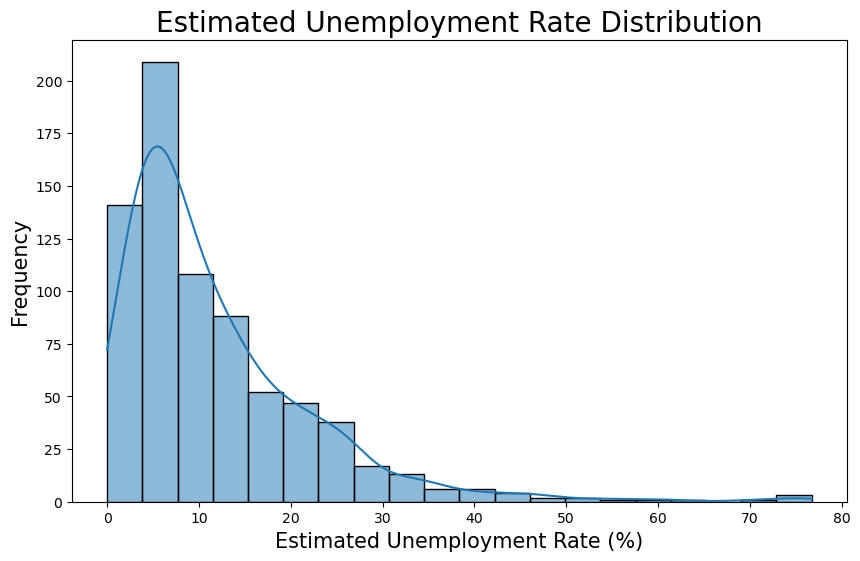

In [20]:
# HISTOGRAM OF THE ESTIMATED UNEMPLOYMENT RATE
print("\t\t\t\tHISTOGRAM OF THE ESTIMATED UNEMPLOYMENT RATE")
print("\t\t\t************************************************************")
plt.figure(figsize=(10, 6))
sns.histplot(data['Estimated Unemployment Rate (%)'], bins=20, kde=True)
plt.title('Estimated Unemployment Rate Distribution',size=20)
plt.xlabel('Estimated Unemployment Rate (%)',size=15)
plt.ylabel('Frequency',size=15)
plt.show()

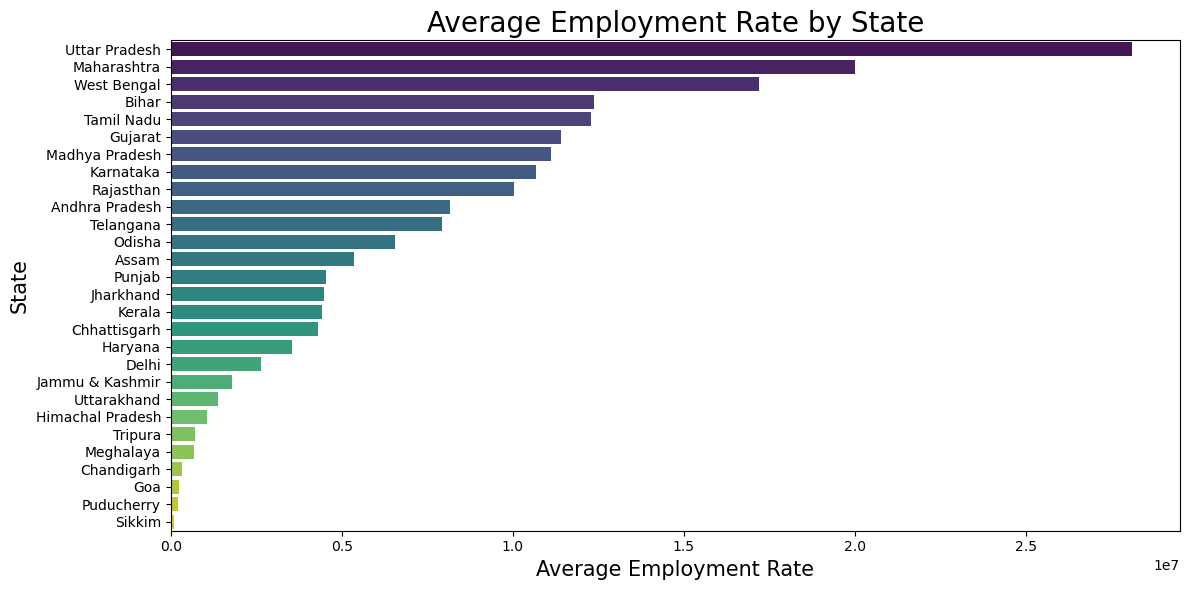

In [21]:
# To visualize state wise average employment rate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
average_employment_by_state = data.groupby('Region')['Estimated Employed'].mean().reset_index()
average_employment_by_state = average_employment_by_state.sort_values(by='Estimated Employed', ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x='Estimated Employed', y='Region', data=average_employment_by_state, palette='viridis')
plt.title('Average Employment Rate by State',size=20)
plt.xlabel('Average Employment Rate',size=15)
plt.ylabel('State',size=15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

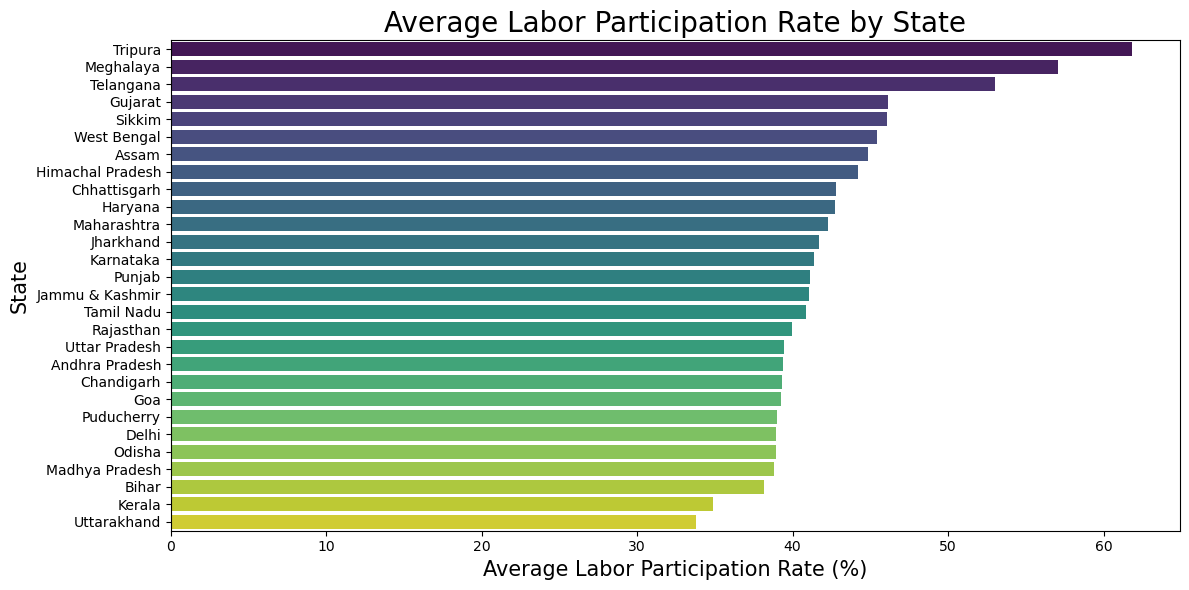

In [22]:
# To visualize the state-wise average labor participation rate
average_labor_participation_by_state = data.groupby('Region')['Estimated Labour Participation Rate (%)'].mean().reset_index()
average_labor_participation_by_state = average_labor_participation_by_state.sort_values(by='Estimated Labour Participation Rate (%)', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Estimated Labour Participation Rate (%)', y='Region', data=average_labor_participation_by_state, palette='viridis')
plt.title('Average Labor Participation Rate by State',size=20)
plt.xlabel('Average Labor Participation Rate (%)',size=15)
plt.ylabel('State',size=15)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

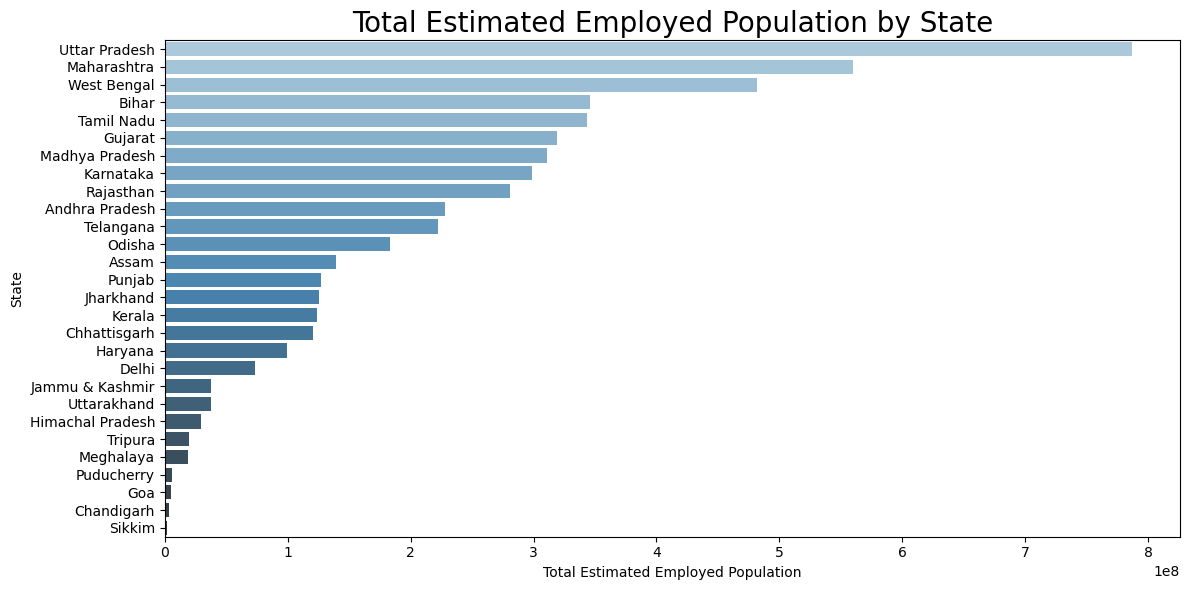

In [23]:
#To visualize the state-wise total estimated employed population
total_employed_by_state = data.groupby('Region')['Estimated Employed'].sum().reset_index()
total_employed_by_state = total_employed_by_state.sort_values(by='Estimated Employed', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Estimated Employed', y='Region', data=total_employed_by_state, palette='Blues_d')
plt.title('Total Estimated Employed Population by State',size=20)
plt.xlabel('Total Estimated Employed Population')
plt.ylabel('State')
plt.xticks(rotation=0)  
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


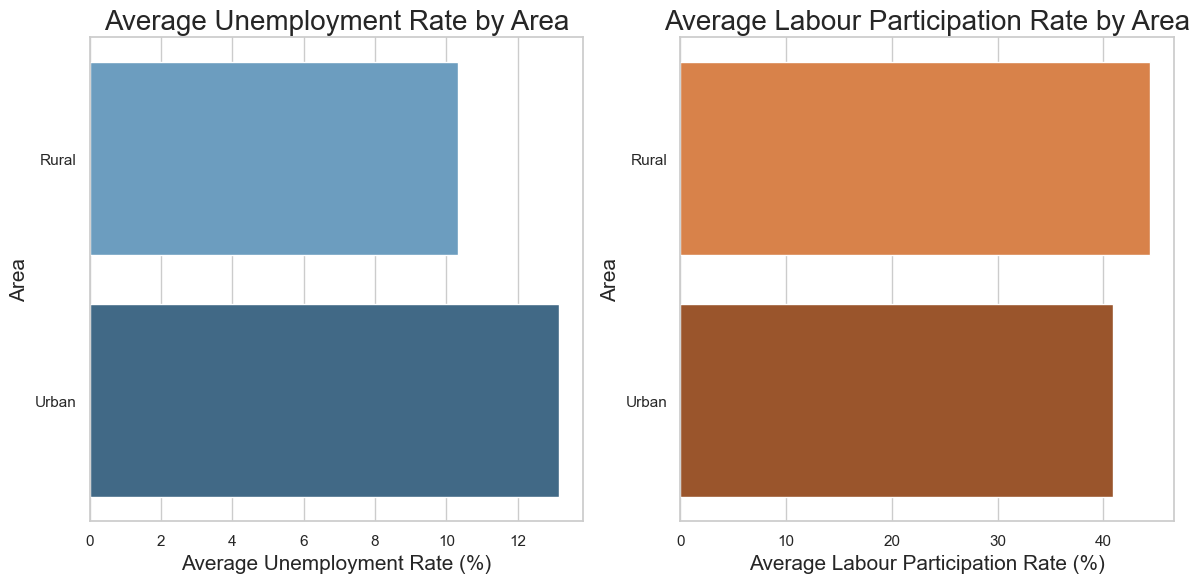

In [24]:
#To visualize the average "Unemployment Rate" and "Labour Participation Rate" with respect to the "Area" 
avg_rates_by_area = data.groupby('Area')[['Estimated Unemployment Rate (%)', 'Estimated Labour Participation Rate (%)']].mean().reset_index()
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x='Estimated Unemployment Rate (%)', y='Area', data=avg_rates_by_area, ax=axes[0], palette='Blues_d')
axes[0].set_title('Average Unemployment Rate by Area',size=20)
axes[0].set_xlabel('Average Unemployment Rate (%)',size=15)
axes[0].set_ylabel('Area',size=15)

sns.barplot(x='Estimated Labour Participation Rate (%)', y='Area', data=avg_rates_by_area, ax=axes[1], palette='Oranges_d')
axes[1].set_title('Average Labour Participation Rate by Area',size=20)
axes[1].set_xlabel('Average Labour Participation Rate (%)',size=15)
axes[1].set_ylabel('Area',size=15)

plt.tight_layout()
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_5384\2631630797.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["", "2019", "", "", "", "", "2020"])
C:\Users\admin\AppData\Local\Temp\ipykernel_5384\2631630797.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(["", "2019", "", "", "", "", "2020"])


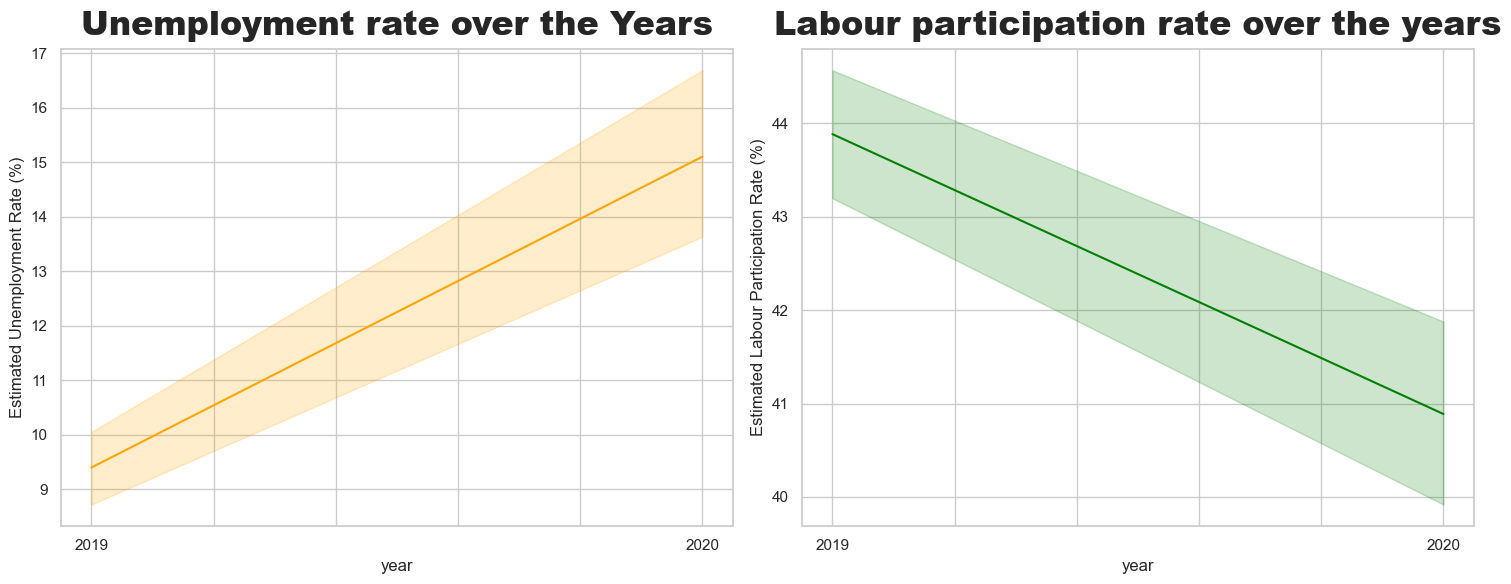

In [25]:
# To visualize the Unemployment Rate and Labour Participation Rate throughout the years
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
ax1 = sns.lineplot(x="year", y="Estimated Unemployment Rate (%)", data=data, color="orange")
ax1.set_xticklabels(["", "2019", "", "", "", "", "2020"])  
plt.title("Unemployment rate over the Years", fontweight="black", fontsize=24, pad=10)

plt.subplot(1, 2, 2)
ax2 = sns.lineplot(x="year", y="Estimated Labour Participation Rate (%)", data=data, color="green")
ax2.set_xticklabels(["", "2019", "", "", "", "", "2020"])  
plt.title("Labour participation rate over the years", fontweight="black", fontsize=24, pad=10)

plt.tight_layout()
plt.show()

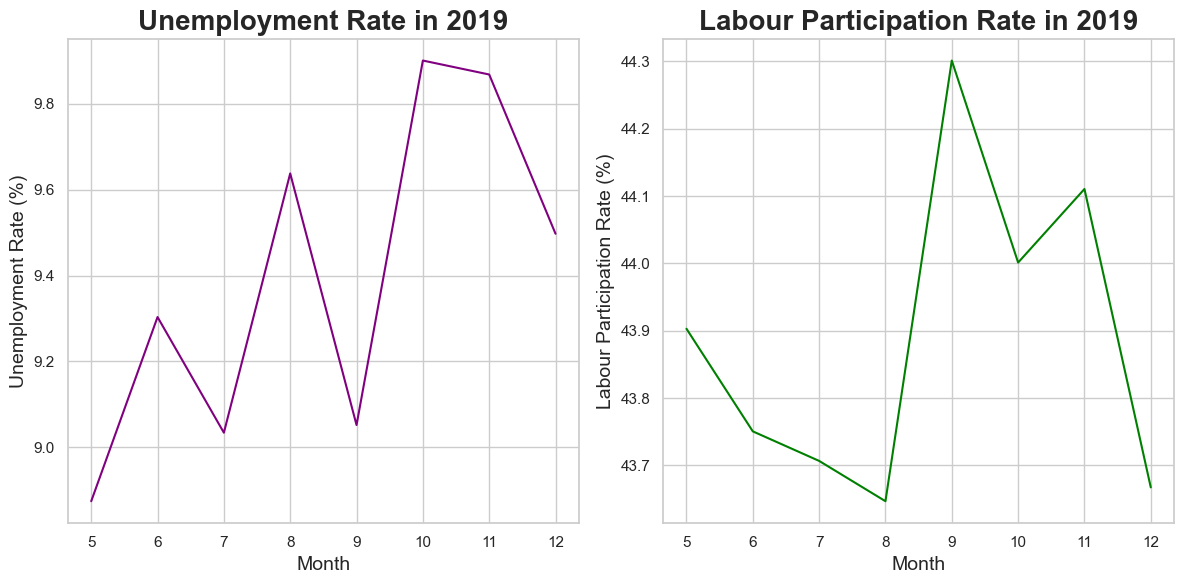

In [26]:
#To visualize the unemployment and labor participation rates in 2019 throughout the months
data_2019 = data[data['year'] == 2019]
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
ax1 = sns.lineplot(x="month", y="Estimated Unemployment Rate (%)", data=data_2019, color="purple", ci=None)
plt.title("Unemployment Rate in 2019", fontweight="bold", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Unemployment Rate (%)", fontsize=14)

plt.subplot(1, 2, 2)
ax2 = sns.lineplot(x="month", y="Estimated Labour Participation Rate (%)", data=data_2019, color="green", ci=None)
plt.title("Labour Participation Rate in 2019", fontweight="bold", fontsize=20)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Labour Participation Rate (%)", fontsize=14)

plt.tight_layout()
plt.show()

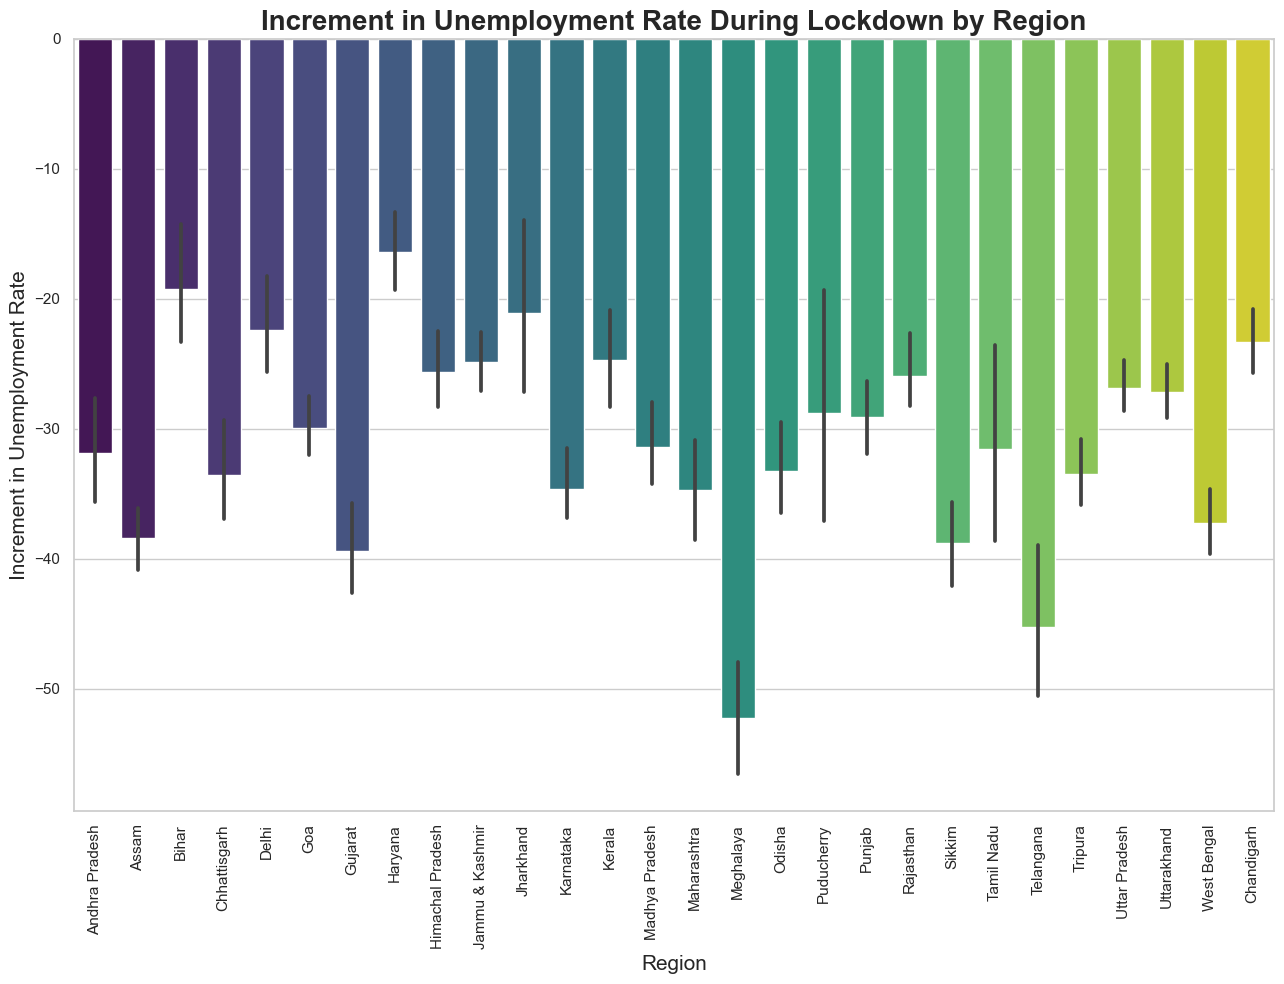

In [27]:
#To visualize the state-wise increment in unemployment rate during the lockdown
data['Increment in Unemployment Rate'] = data.iloc[:, 3] - data.iloc[:, 5]
sns.set(style="whitegrid")

plt.figure(figsize=(13, 10))
sns.barplot(x='Region', y='Increment in Unemployment Rate', data=data, palette='viridis')
plt.title('Increment in Unemployment Rate During Lockdown by Region', fontsize=20,fontweight="bold")
plt.xlabel('Region', fontsize=15)
plt.ylabel('Increment in Unemployment Rate', fontsize=15)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()

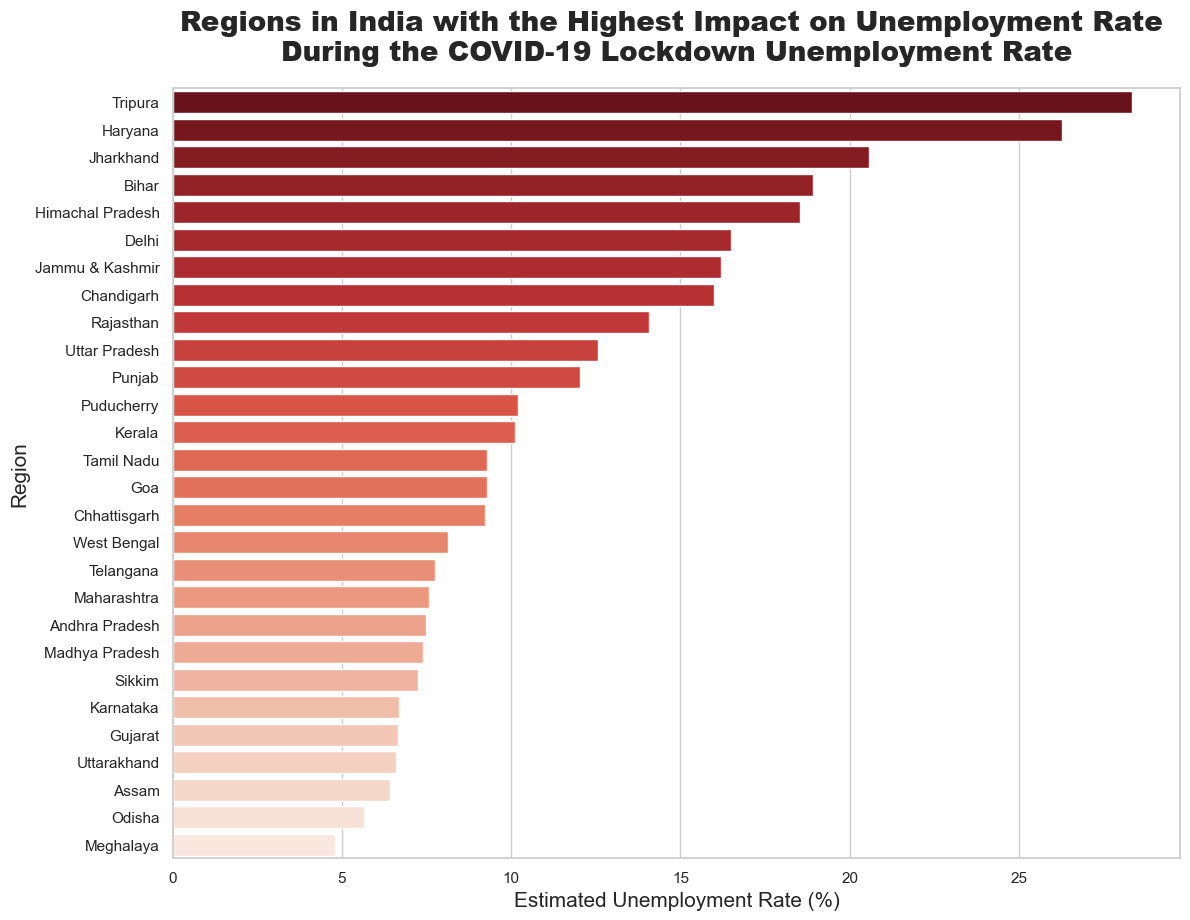

In [28]:
# Regions in India with the Highest Impact on Unemployment Rate During the COVID-19 Lockdown Unemployment Rate
region_unemployment = data.groupby("Region")["Estimated Unemployment Rate (%)"].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(13, 10))
sns.barplot(x="Estimated Unemployment Rate (%)", y=region_unemployment.index, data=region_unemployment, palette=sns.color_palette("Reds", 30)[::-1])
plt.title("Regions in India with the Highest Impact on Unemployment Rate \nDuring the COVID-19 Lockdown Unemployment Rate",
          fontweight="black", fontsize=20, pad=20)
plt.xlabel("Estimated Unemployment Rate (%)",size=15)
plt.ylabel("Region",size=15)
plt.show()